### Assignment[-1] : The last assignment
목적: 학습된 모델을 불러와서 이미지를 테스트해봅니다.

In [174]:
import socket
hostname = socket.gethostname()
print(hostname)

spacegray


In [175]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [176]:
tf.__version__, tf.keras.__version__

('2.3.0', '2.4.0')

In [177]:
from nnutil_20 import imshow
from nnutil_20 import center_crop
from nnutil_20 import random_crop

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

### 학습된 모델 불러오기

In [179]:
model_fn = 'handpose_224.h5'

In [180]:
model = keras.models.load_model(model_fn)

잘 불러와졌는지 확인해봅니다.

In [181]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [182]:
n_classes = model.get_layer('dense_1').output_shape[-1] 
print(n_classes)
# 마지막 레이어의 형상이 6인데, 이를 클래스 갯수로 활용
# https://stackoverflow.com/a/49527269

6


### 테스트할 사진 불러오기

테스트 용으로 제공하였습니다

In [240]:
import glob
types = ('*.jpg', '*.JPG', '*.png') # the tuple of file types
files_grabbed = []

for fmt in types:
    files_grabbed.extend(glob.glob('./dataset_test/'+fmt))

In [241]:
print('#인덱스\t파일이름')
for idx,fn in enumerate(files_grabbed):
    print(idx, '\t', fn)

#인덱스	파일이름
0 	 ./dataset_test/20190523_madong.jpg
1 	 ./dataset_test/KakaoTalk_20190529_211825276_01.jpg
2 	 ./dataset_test/20171128101824.jpg
3 	 ./dataset_test/20190529_151723.jpg
4 	 ./dataset_test/KakaoTalk_20190529_212405562_16.jpg
5 	 ./dataset_test/20190529_180722(2).jpg
6 	 ./dataset_test/20190529_154632(0).jpg
7 	 ./dataset_test/20190527_205327.jpg
8 	 ./dataset_test/20190527_210614.jpg
9 	 ./dataset_test/KakaoTalk_Moim_2019Oct.jpg
10 	 ./dataset_test/20190529_153704.jpg
11 	 ./dataset_test/20190528_152242.jpg
12 	 ./dataset_test/20190529_092016.jpg
13 	 ./dataset_test/IMG_9821.JPG


<b>아래의 idx 변수를 바꾸어</b> 기존 제공된 데이터를 테스트해보세요

In [242]:
idx = 2 #인덱스를 위의 셀 결과를 참고하여 바꾸어 보세요. 
fn_test = files_grabbed[idx] 
print(fn_test)

./dataset_test/20171128101824.jpg


In [243]:
f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(300, 400)


In [244]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(300, 400, 3)


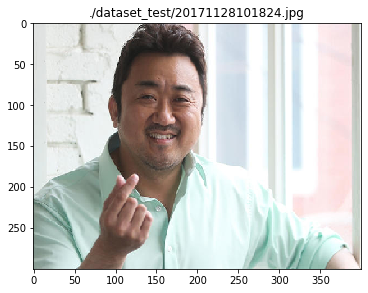

In [245]:
imshow(input_arr, title=fn_test)

### 이미지를 정사각형으로 잘라서 테스트 해보기
실제 학습할 때 아래처럼 정사각형 형태로 잘라서 학습을 하였습니다.

In [246]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

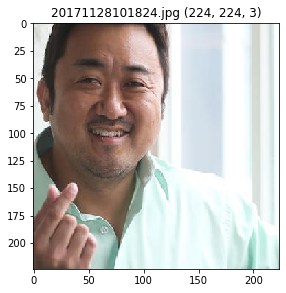

In [247]:
img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [248]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [249]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, '20171128101824.jpg/ Pred.: #4 --> 99.6992%')

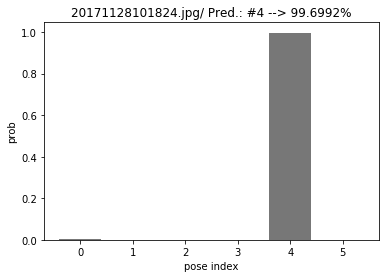

In [250]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0))

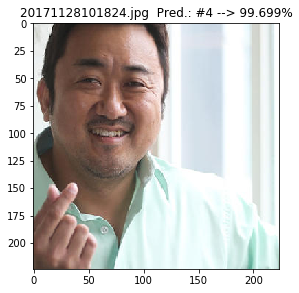

In [251]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))

### TODO
* 이미지를 바꾸어가며 테스트를 해보세요. 여러분이 새롭게 사진을 찍고 넣은 뒤 테스트 해보세요. 이미지는 아래 폴더에 넣어두면 됩니다.
```
dataset_test
```
* 주의 1: Dataset 과제로 제출한 사진이 아니어야함. 
* 주의 2: 본 과제에서는 제한된 분량의 사진을 이용하여 비교적 단순한 네트워크를 학습하였습니다. <br/>
따라서 모든 hand gesture 를 이해할 수 있지는 못합니다. 여러분의 학습 목적을 위해 구성된 코드이므로 가급적 과제에서 찍었던 것과 유사한 구도로 찍어보면 이해에 도움이 될 것입니다.
* 주의 3 : 리눅스 시스템은 파일명의 대소문자를 구분합니다. 확장자가 jpg 인지, JPG 인지 확인해보세요
* 아래 두 셀의 내용을 지우고 위의 예처럼 본인의 사진 혹은 본인이 찍은 사진을 올리고 성공적으로 되는 예, 실패하는 예를 각각 구현해주세요. 그리고 실패가 되었다면, 어떤 클래스로 분류가 되었는데, 그 이유는 무엇일지 각각 고찰해주세요. <u>(각 1.5점)</u>

### 성공적으로 추론 되는 예 (1.5 pts)
아래 셀들을 구현 하면 됩니다.

In [ ]:
fn_test = 'dataset_test/aaa.jpg'  # 여러분의 새로운 파일로 대체해주세요. 
print(fn_test)

raise NotImplementedError # 이 줄은 구현이 되면 삭제 해주세요

### 추론 실패하는 예 (1.5 pts)
아래 셀들을 구현 하면 됩니다.

In [ ]:
fn_test = 'dataset_test/bbb.jpg' # 여러분의 새로운 파일로 대체해주세요. 
print(fn_test)
raise NotImplementedError  # 이 줄은 구현이 되면 삭제 해주세요